### Problem 1.1

In [1]:
import json
import matplotlib.pyplot as plt

def read_file(hashtag):
    file_name = 'tweets_'+ hashtag+ '.txt'
    file_path = './tweet_data/'+ file_name
    input_file = open(file_path)
    return input_file

def close_file(file):    
    file.close()

def extract_data(file):
    time_stamps = []
    num_of_followers = []
    num_of_retweets = []
    followers_of_users = dict([])
    
    for line in file:
        data = json.loads(line)
        time_stamps.append(data['citation_date'])
        num_of_retweets.append(data['metrics']['citations']['total'])
        num_of_followers.append(data['author']['followers'])
        
        user_name = data['author']['nick']
        if user_name in followers_of_users:
            followers_of_users[user_name].append(data['author']['followers'])
        else:
            followers_of_users[user_name] = [data['author']['followers']]
    
    close_file(file)
    return time_stamps, num_of_followers, num_of_retweets, followers_of_users 

def calculate(time_stamps, num_of_followers, num_of_retweets, followers_of_users):
    followers = []    
    
    total_number_of_tweets = float(len(time_stamps))
    hours = float(max(time_stamps)-min(time_stamps))/3600.0
    total_number_of_retweets = float(sum(num_of_retweets))

    for user in followers_of_users:
        followers.append(float(sum(followers_of_users[user]))/float(len(followers_of_users[user])))
    
    average_number_tweets_per_hour = total_number_of_tweets/hours
    average_number_followers_per_user = sum(followers)/len(followers)
    average_number_retweets = total_number_of_retweets/total_number_of_tweets
    return average_number_tweets_per_hour, average_number_followers_per_user, average_number_retweets

def print_stats(hashtag, average_number_tweets_per_hour, average_number_followers_per_user, average_number_retweets):
    print('#'*20)
    print('Statistics for ', hashtag)
    print('Average number of tweets per hour: ', average_number_tweets_per_hour)
    print('Average number of followersof users posting the tweets: ', average_number_followers_per_user)
    print('Average number of retweets: ', average_number_retweets)

def plot_histogram(time_stamps, hashtag):
    tweet_count_per_hour = [0] * int((max(time_stamps)-min(time_stamps))/3600+1)
    start_time = min(time_stamps)
    for time_stamp in time_stamps:
        tweet_count_per_hour[int((time_stamp-start_time)/3600)] += 1
           
    plt.figure(figsize = (12,8))
    plt.bar([i for i in range(0,len(tweet_count_per_hour))], tweet_count_per_hour, 1, align='edge', color = 'k')
    hours = float(max(time_stamps)-min(time_stamps))/3600.0
    plt.axis([0,hours+1,0,int(max(tweet_count_per_hour)*1.03)])
    plt.xlabel('Time(Hour)', fontsize = 15)
    plt.ylabel('Number of Tweets', fontsize = 15)
    plt.title('Number of Tweets over Time (' + hashtag + ')', fontsize = 20)
    plt.show() 

####################
Statistics for  #gohawks
Average number of tweets per hour:  325.37159130433116
Average number of followersof users posting the tweets:  1588.1886629300582
Average number of retweets:  2.014617085512608
####################
Statistics for  #gopatriots
Average number of tweets per hour:  45.69451057356203
Average number of followersof users posting the tweets:  1294.4693664626748
Average number of retweets:  1.4000838670326319
####################
Statistics for  #nfl
Average number of tweets per hour:  441.3234311373958
Average number of followersof users posting the tweets:  4221.076987865717
Average number of retweets:  1.5385331089011056
####################
Statistics for  #patriots
Average number of tweets per hour:  834.5555091641886
Average number of followersof users posting the tweets:  1695.2710621477224
Average number of retweets:  1.7828156491659402
####################
Statistics for  #sb49
Average number of tweets per hour:  1419.8879074871902
Average

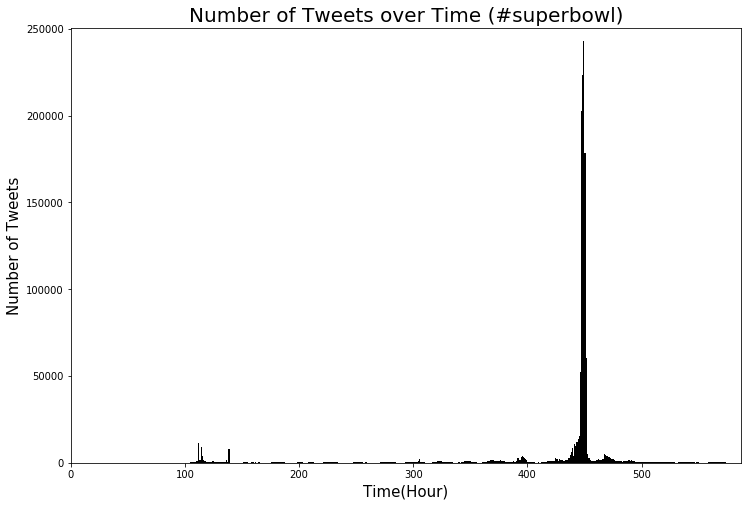

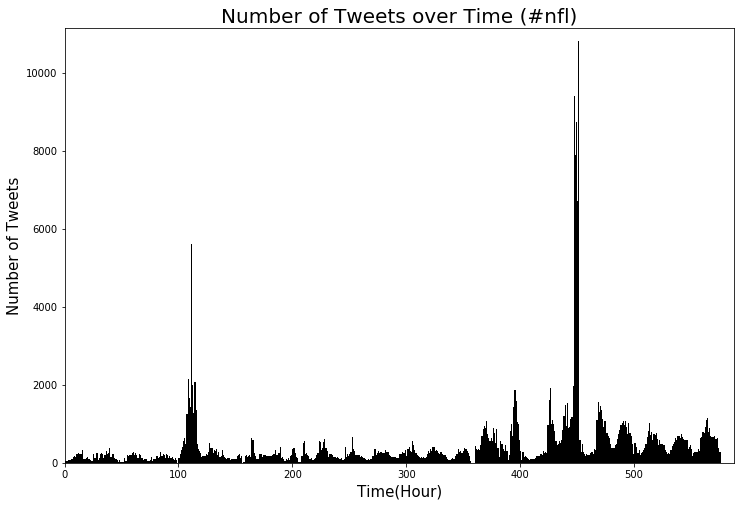

In [3]:
hashtags = ['#gohawks', '#gopatriots', '#nfl', '#patriots', '#sb49', '#superbowl']
for hashtag in hashtags:
    time_stamps, num_of_followers, num_of_retweets, followers_of_users = extract_data(read_file(hashtag))
    average_number_tweets_per_hour, average_number_followers_per_user, average_number_retweets = calculate(time_stamps, num_of_followers, num_of_retweets, followers_of_users)
    print_stats(hashtag, average_number_tweets_per_hour, average_number_followers_per_user, average_number_retweets)
    
for hashtag in ['#superbowl', '#nfl']:
    time_stamps, num_of_followers, num_of_retweets, followers_of_users = extract_data(read_file(hashtag))
    plot_histogram(time_stamps, hashtag)
    